In [111]:

#Import the Necessary Libraries 

import mne
import pandas as pd 
import numpy
from scipy.io import loadmat
import scipy
import matplotlib.pyplot as plt

In [113]:
### Load the EEG Data
# https://mne.tools/stable/generated/mne.io.read_raw_gdf.html#mne.io.read_raw_gdf

"""Explination: Load Data: The GDF file is loaded into an MNE Raw object, which is a convenient structure for handling continuous EEG data. The Raw object stores data along with metadata, such as channel names, sampling frequency, and measurement units.
EOG Handling: By specifying EOG channels, MNE knows to treat these channels differently during preprocessing steps like filtering, epoching, and artifact correction. It helps in separating EEG signals from potential noise caused by eye movements.
Accessing Data: Once loaded, you can access various properties of the Raw object. For example, raw.info will display information about the channels, including types and sampling rates, while raw.plot() allows you to visualize the data."""

"""
Event type Description
276 0x0114 Idling EEG (eyes open) = 3
277 0x0115 Idling EEG (eyes closed) = 4
768 0x0300 Start of a trial = 6
769 0x0301 Cue onset left (class 1) = 7
770 0x0302 Cue onset right (class 2) = 8
771 0x0303 Cue onset foot (class 3) = 9
772 0x0304 Cue onset tongue (class 4) = 10
783 0x030F Cue unknown
1023 0x03FF Rejected trial = 1
1072 0x0430 Eye movements = 2
32766 0x7FFE Start of a new run

{'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})"""


raw = mne.io.read_raw_gdf('data_gdf/A01T.gdf',eog=['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from /Users/adamkadwory/Desktop/bci_Project/data_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [114]:
#Visualize the data and info about the data

#print(raw.info)
#raw.plot()
print(raw.ch_names)

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


In [115]:
"""
Why Drop Channels?
Simplify Data Analysis:
Removing non-essential channels can simplify data visualization and analysis, especially if you're only interested in EEG activity.
Reduce Memory Usage:
Dropping channels reduces the dataset's size, which can be beneficial for computational efficiency and memory management.
Focus on Relevant Data:
Dropping irrelevant channels helps focus the analysis on the signals of interest, ensuring that any preprocessing or analysis steps are applied only to the necessary channels.

"""
# you don't have to do it twice since it is already been removed from the first execution.
#raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

"\nWhy Drop Channels?\nSimplify Data Analysis:\nRemoving non-essential channels can simplify data visualization and analysis, especially if you're only interested in EEG activity.\nReduce Memory Usage:\nDropping channels reduces the dataset's size, which can be beneficial for computational efficiency and memory management.\nFocus on Relevant Data:\nDropping irrelevant channels helps focus the analysis on the signals of interest, ensuring that any preprocessing or analysis steps are applied only to the necessary channels.\n\n"

In [116]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [98]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [99]:
events[0][0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

In [100]:
event_dict = {
    'reject': 1,
  'eye move': 2,
  'eye open': 3,
  'eye close': 4,
  'new run': 5,
  'new trial': 6,
  'class 1': 7,
  'class 2': 8,
  'class 3': 9,
  'class 4': 10}



In [108]:
events[0]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]])

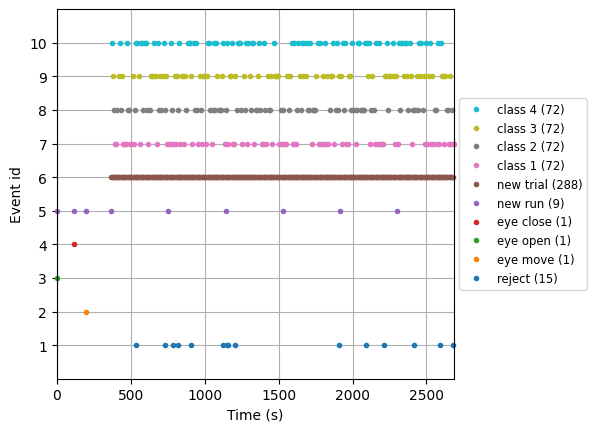

In [109]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],first_samp=raw.first_samp)

In [149]:
events[0][:]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]])

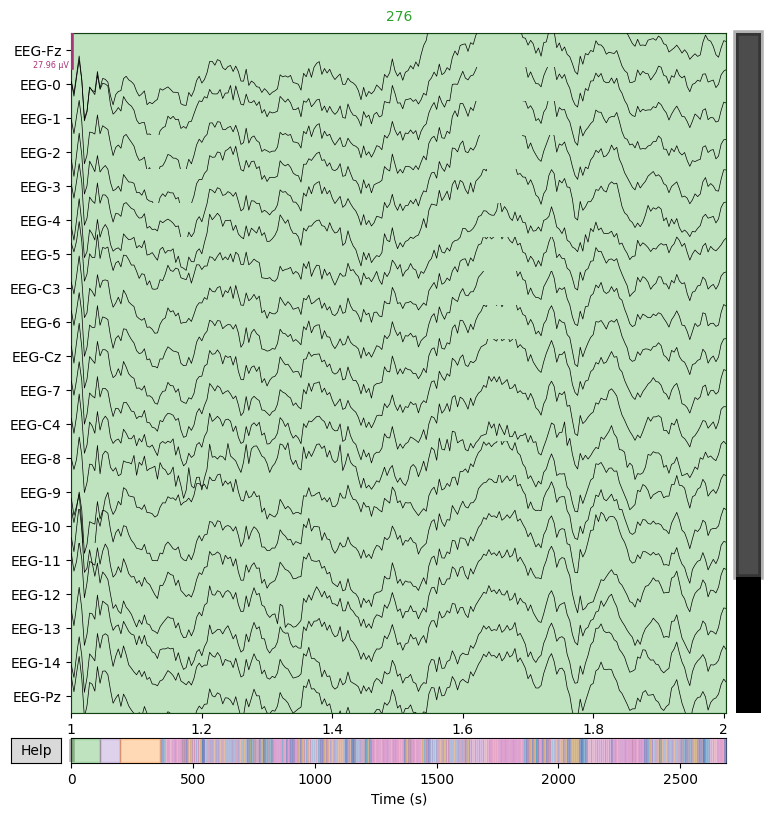

In [150]:
fig = raw.plot(events=events[0][:], start=1, duration=1, scalings='auto')

In [153]:

mne.viz.plot_event_histogram(events)

AttributeError: No mne.viz attribute plot_event_histogram

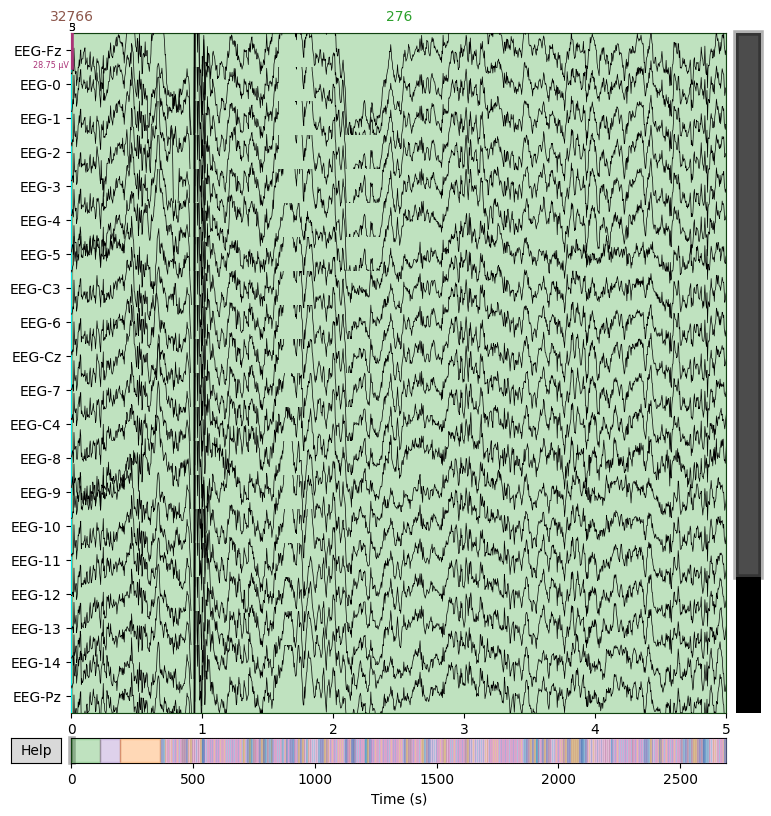

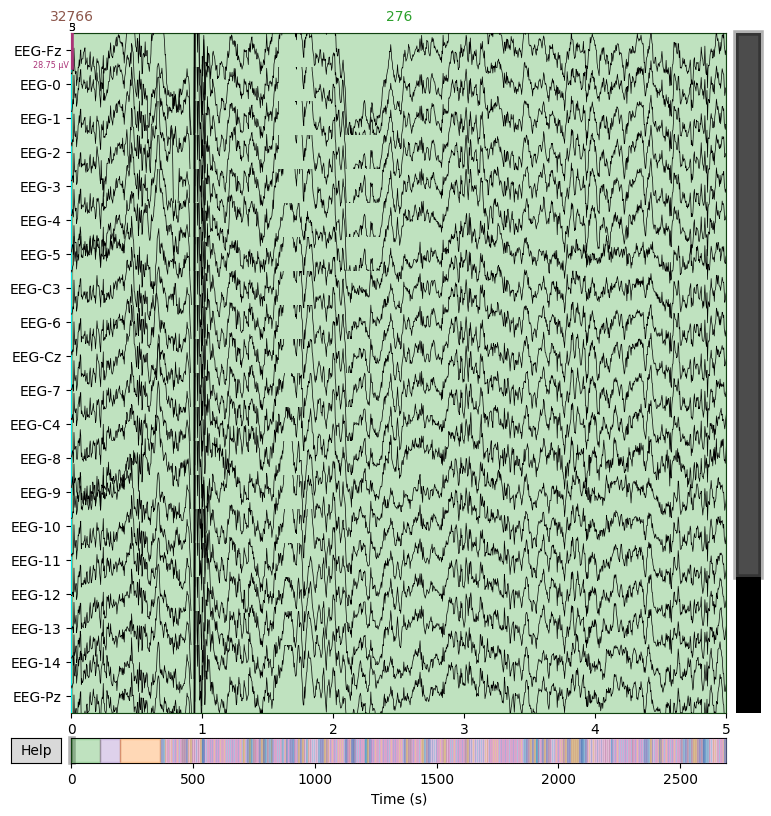

In [156]:
raw.plot(events=events[0],duration=5,scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/var/folders/_c/tqw9x_hs0mz3dzr5czl7c0tw0000gn/T/ipykernel_84598/1643215239.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=100)
/Users/adamkadwory/opt/anaconda3/envs/mne_env/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


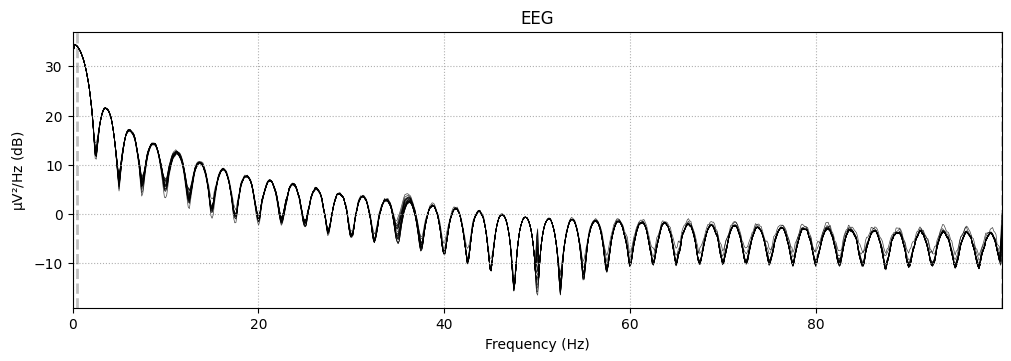

In [63]:
raw.plot_psd(fmax=100)

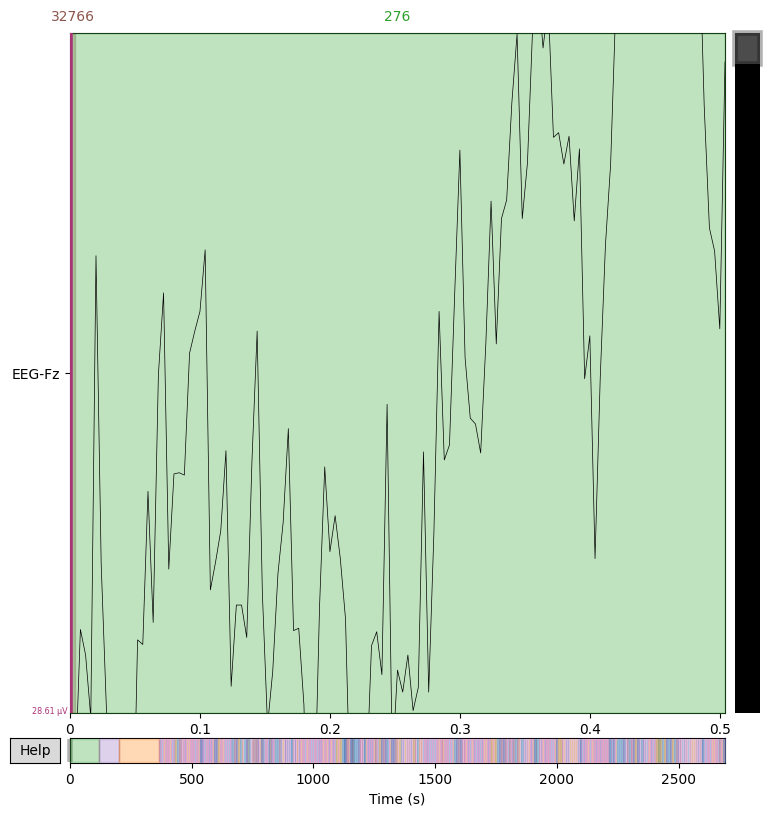

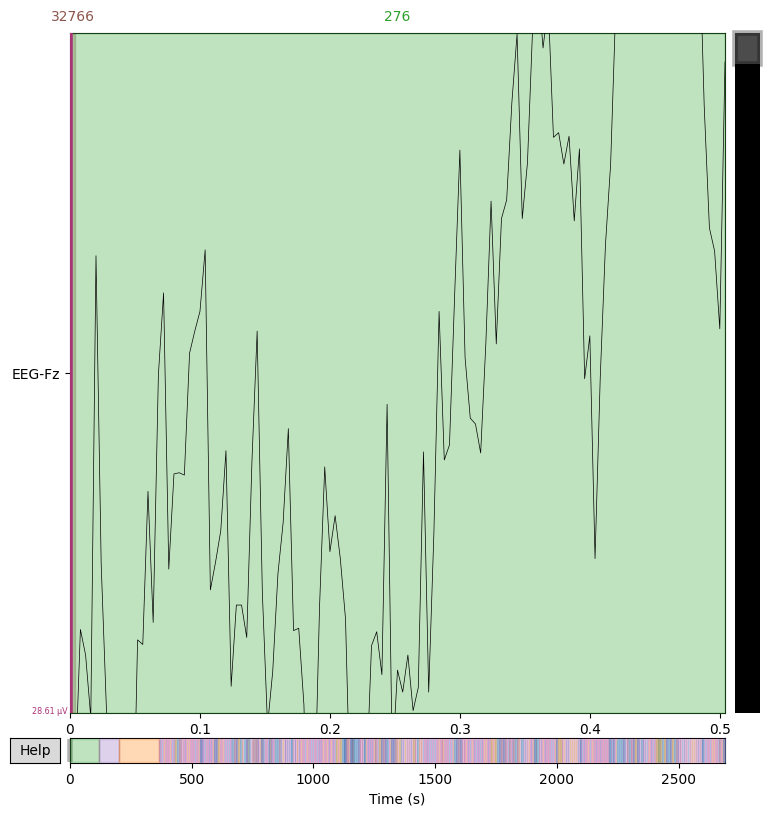

In [77]:
raw.plot(duration=0.5, n_channels=1, scalings='auto', block=True)

In [174]:
epochs = mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7)

Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 20 events and 201 original time points ...


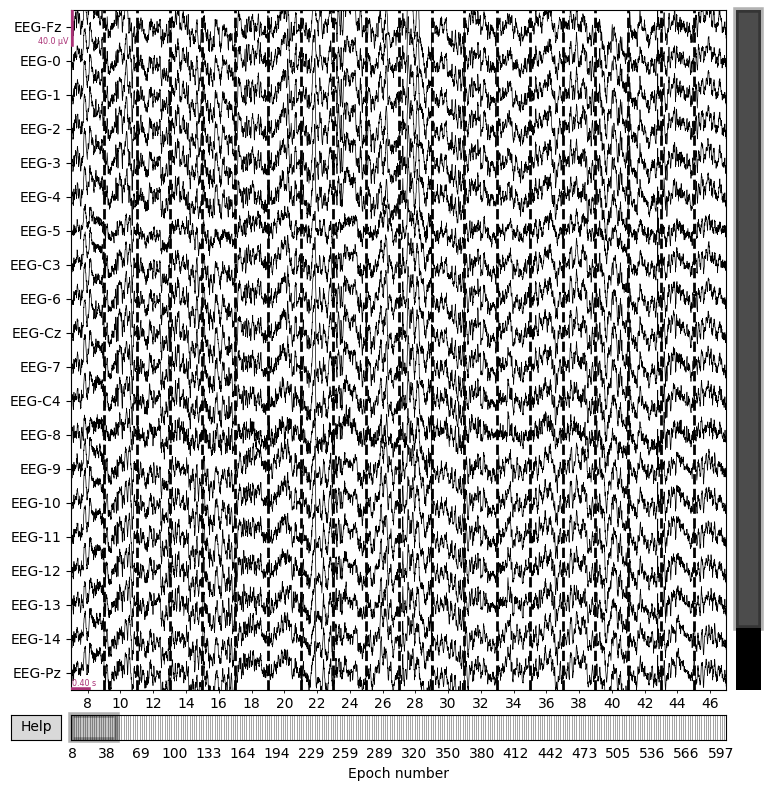

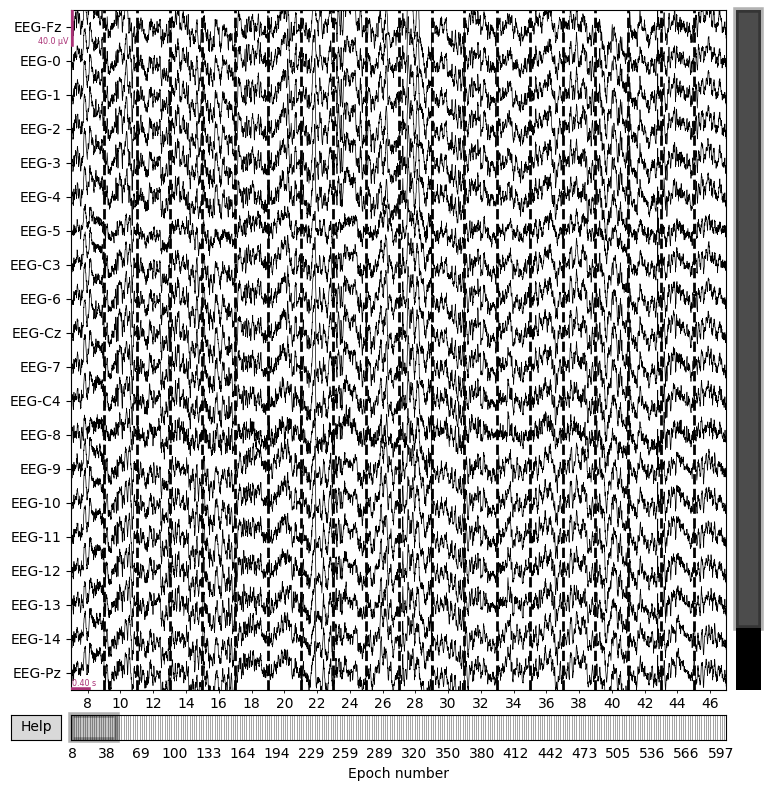

In [180]:
epochs.plot()

In [175]:
epochs.get_data().shape

Loading data for 288 events and 201 original time points ...
0 bad epochs dropped


(288, 25, 201)

In [176]:
labels =epochs.events[:,-1]

In [177]:
labels

array([10,  9,  8,  7,  7,  8,  9, 10,  8,  9,  7,  7,  7, 10,  8,  8,  7,
        7,  9,  7,  8, 10, 10,  9,  7, 10, 10,  8, 10, 10,  8,  7,  8,  9,
        9,  9, 10,  9,  7, 10,  8,  9,  8,  9, 10,  8,  9,  7,  7,  7, 10,
        8,  7,  9,  7,  9,  8, 10,  7,  9,  9,  7,  9,  8, 10, 10, 10,  9,
        7, 10,  8, 10,  8,  7,  9,  8,  7,  9,  9,  7,  9, 10, 10,  8,  7,
        8, 10,  8, 10,  9,  8,  8,  8,  9, 10,  7,  8, 10,  7,  9,  9, 10,
        7,  7,  9,  8, 10, 10, 10,  8,  7,  9,  8, 10,  7, 10,  9,  8, 10,
       10,  7,  8,  8,  9, 10,  8,  7,  7, 10,  8,  7,  9,  8,  8,  9,  7,
       10,  9,  9,  9,  9,  7,  8,  7,  8,  7,  7,  9,  9,  8,  9, 10,  7,
       10,  7,  7,  8, 10,  9,  8, 10,  9, 10,  9, 10,  8,  8, 10,  7,  8,
        8,  8,  9, 10,  7, 10,  7,  9,  7, 10,  7,  9,  7,  8,  9,  9, 10,
        7,  8, 10,  8,  9,  9,  7, 10,  8, 10,  7,  7,  9,  9,  8, 10,  8,
        8,  7,  8, 10, 10,  8,  8,  8,  8, 10, 10,  9, 10,  7,  8,  9,  8,
        7, 10,  7, 10,  7

In [178]:
evoked_1 = epochs['7'].average()
evoked_2 = epochs['8'].average()
evoked_3 = epochs['9'].average()
evoked_4 = epochs['10'].average()

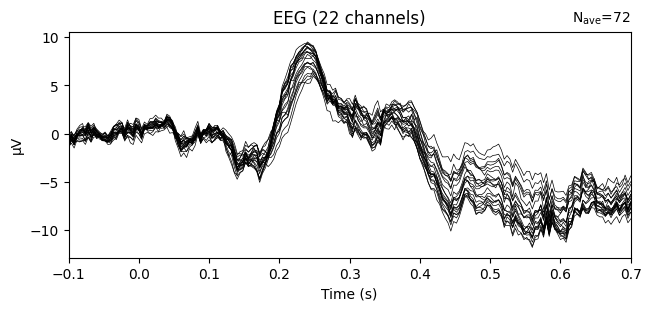

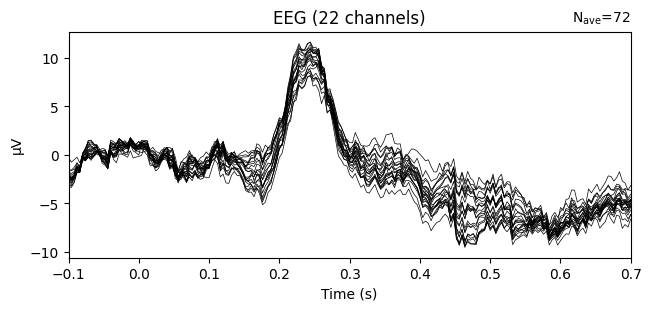

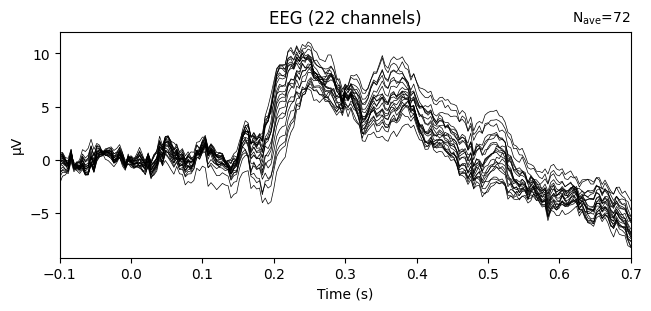

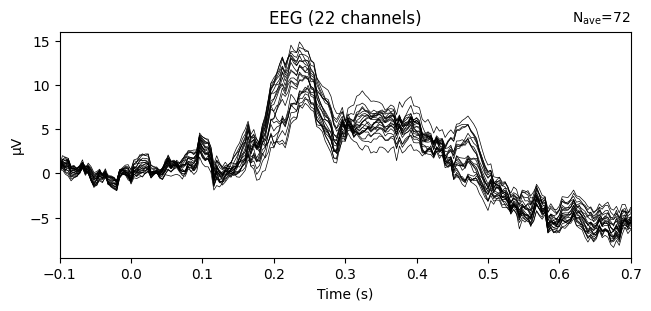

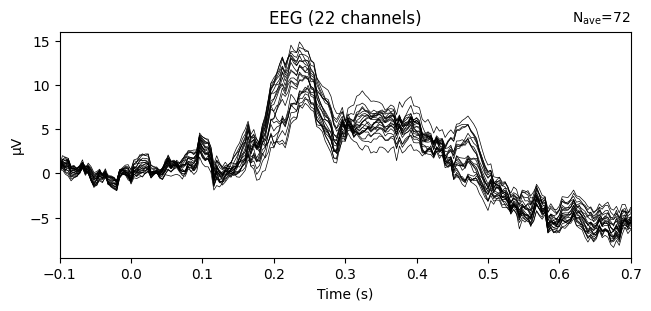

In [182]:
evoked_1.plot()
evoked_2.plot()
evoked_3.plot()
evoked_4.plot()

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


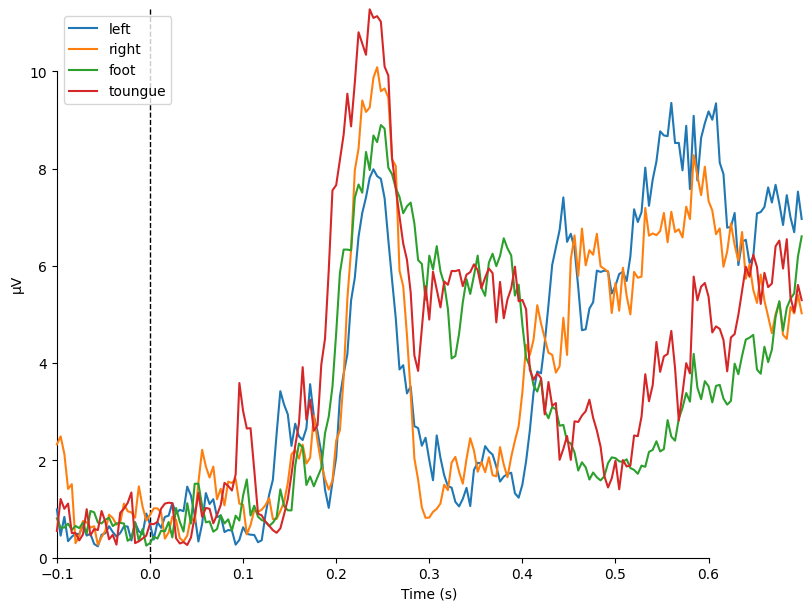

[<Figure size 800x600 with 1 Axes>]

In [179]:
dicts={'left':evoked_1,'right':evoked_2,'foot':evoked_3,'toungue':evoked_4}
mne.viz.plot_compare_evokeds(dicts)